<a href="https://colab.research.google.com/github/alro923/Tensorflow_Study/blob/main/CNN_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    "http://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" \
    -O "/tmp/cats_and_dogs_filtered.zip"


--2020-08-25 06:46:22--  http://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2020-08-25 06:46:22 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat.732.jpg', 'cat.907.jpg', 'cat.224.jpg', 'cat.271.jpg', 'cat.158.jpg', 'cat.285.jpg', 'cat.53.jpg', 'cat.308.jpg', 'cat.861.jpg', 'cat.976.jpg']
['dog.380.jpg', 'dog.576.jpg', 'dog.777.jpg', 'dog.504.jpg', 'dog.843.jpg', 'dog.191.jpg', 'dog.340.jpg', 'dog.919.jpg', 'dog.224.jpg', 'dog.396.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

['/tmp/cats_and_dogs_filtered/train/cats/cat.861.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.976.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.882.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.964.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.178.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.69.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.829.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.577.jpg']


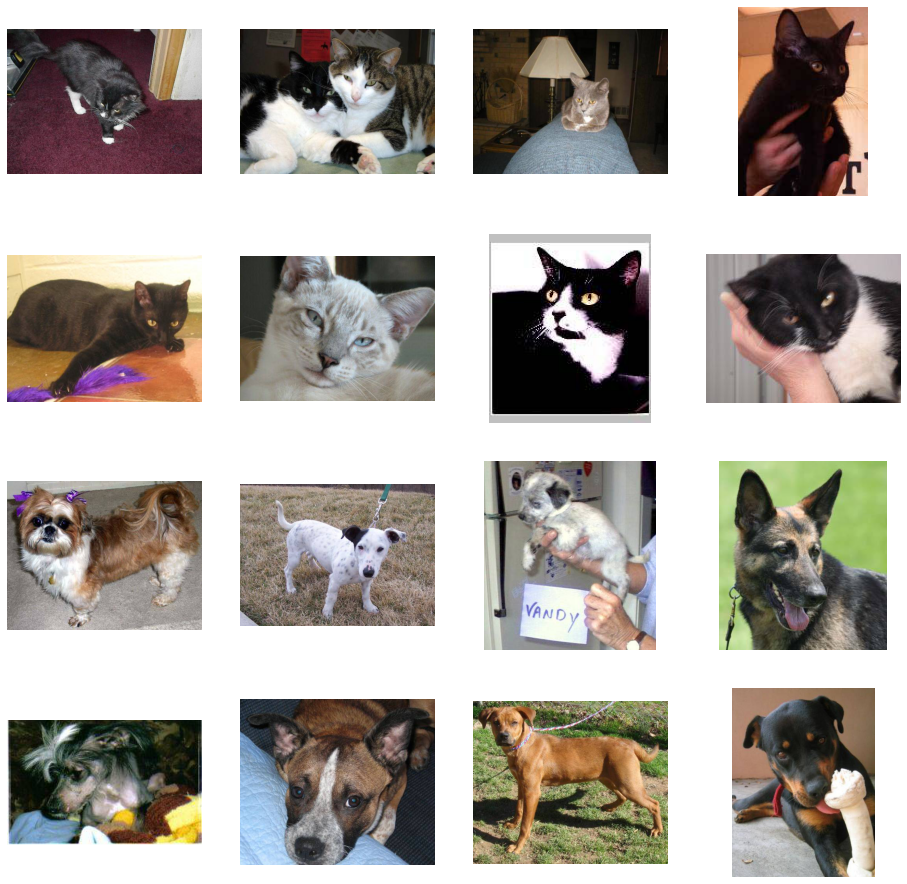

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]
print(next_cat_pix)
for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # only 1 output neuron. it will contatin a value from 0-1, 0 for 'cat' class, 1 for 'dog' class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 55s - loss: 0.7910 - acc: 0.5365 - val_loss: 0.6514 - val_acc: 0.6490
Epoch 2/15
100/100 - 55s - loss: 0.6228 - acc: 0.6700 - val_loss: 0.6628 - val_acc: 0.6270
Epoch 3/15
100/100 - 55s - loss: 0.5658 - acc: 0.7160 - val_loss: 0.5829 - val_acc: 0.7080
Epoch 4/15
100/100 - 55s - loss: 0.4742 - acc: 0.7740 - val_loss: 0.5577 - val_acc: 0.7130
Epoch 5/15
100/100 - 55s - loss: 0.3941 - acc: 0.8205 - val_loss: 0.6731 - val_acc: 0.6820
Epoch 6/15
100/100 - 55s - loss: 0.3224 - acc: 0.8600 - val_loss: 0.6847 - val_acc: 0.7290
Epoch 7/15
100/100 - 55s - loss: 0.2540 - acc: 0.8885 - val_loss: 0.7471 - val_acc: 0.7390
Epoch 8/15
100/100 - 55s - loss: 0.1740 - acc: 0.9320 - val_loss: 0.8308 - val_acc: 0.7340
Epoch 9/15
100/100 - 55s - loss: 0.1166 - acc: 0.9575 - val_loss: 1.2253 - val_acc: 0.7180
Epoch 10/15
100/100 - 55s - loss: 0.0984 - acc: 0.9665 - val_loss: 1.1519 - val_acc: 0.7350
Epoch 11/15
1

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]>0:
    print(fn + ' is a dog')
  else :
    print(fn + ' is a cat')

Saving cat-2-crop.jpg to cat-2-crop.jpg
Saving cat-3-crop.jpg to cat-3-crop.jpg
Saving dog-3-crop.jpg to dog-3-crop.jpg
[1.]
cat-2-crop.jpg is a dog
[1.]
cat-3-crop.jpg is a dog
[1.]
dog-3-crop.jpg is a dog


[[[114. 117. 122.]
  [118. 121. 126.]
  [118. 121. 126.]
  ...
  [ 39.  40.  42.]
  [ 41.  42.  44.]
  [ 17.  21.  22.]]

 [[114. 117. 122.]
  [113. 116. 121.]
  [114. 117. 122.]
  ...
  [ 48.  49.  51.]
  [ 41.  42.  46.]
  [ 10.  14.  15.]]

 [[115. 118. 123.]
  [123. 126. 131.]
  [112. 115. 120.]
  ...
  [ 32.  33.  37.]
  [ 16.  17.  22.]
  [  5.   9.  10.]]

 ...

 [[  8.   8.  10.]
  [  6.   6.   8.]
  [ 20.  20.  22.]
  ...
  [117. 117. 117.]
  [114. 114. 114.]
  [113. 113. 113.]]

 [[  8.   8.   8.]
  [ 10.  10.  10.]
  [ 12.  12.  12.]
  ...
  [119. 117. 118.]
  [116. 114. 115.]
  [111. 109. 110.]]

 [[  5.   5.   5.]
  [  7.   7.   7.]
  [ 14.  14.  14.]
  ...
  [123. 121. 122.]
  [120. 118. 119.]
  [118. 116. 117.]]]
[[[[114. 117. 122.]
   [118. 121. 126.]
   [118. 121. 126.]
   ...
   [ 39.  40.  42.]
   [ 41.  42.  44.]
   [ 17.  21.  22.]]

  [[114. 117. 122.]
   [113. 116. 121.]
   [114. 117. 122.]
   ...
   [ 48.  49.  51.]
   [ 41.  42.  46.]
   [ 10.  14.  15.]]

  [[

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


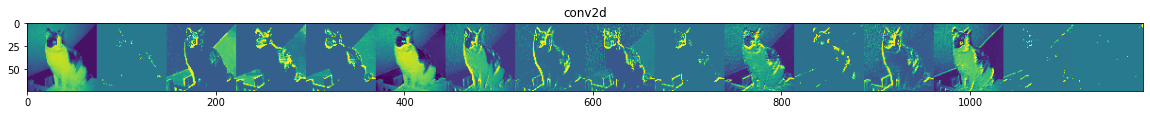

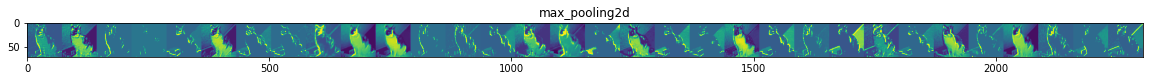

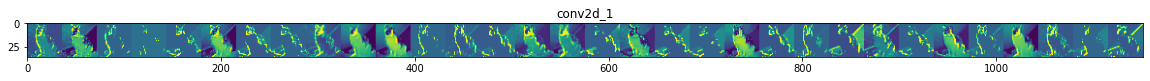

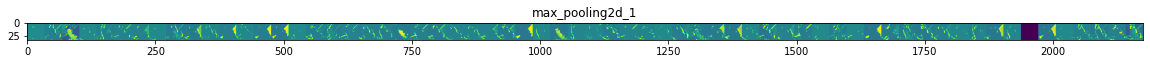

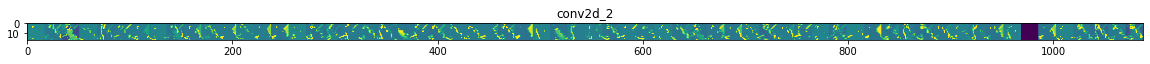

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size = (150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)
print(x)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)
print(x)
x = x/255
print(x)
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))
    for i in range(n_features) :
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x*= 64
      x+= 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size:(i+1)*size] = x

    scale = 20./n_features
    plt.figure(figsize = (scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

Text(0.5, 1.0, 'Training and validation loss')

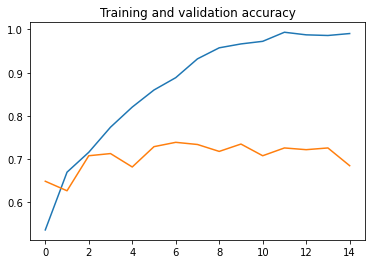

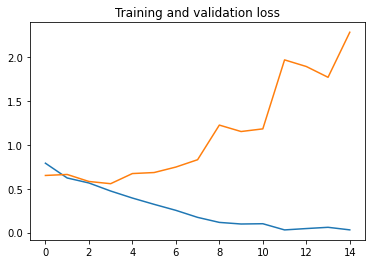

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')